In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [4]:
y = df['target']

In [5]:
X = df.drop(columns=['target'])

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

#####  Feature extraction using principal component analysis (PCA)

Principal component analysis (PCA) performs linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

PCA transforms the data into features that explain the most variance in the data.

For a better performance of PCA, we first need to scale our data so that each features has a single unit varianc

In [8]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 1)
# # pca = PCA(0.9)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [36]:
X_train

array([[-2.07001845],
       [-0.62082166],
       [-0.43720889],
       [-1.61228271],
       [-0.74309534],
       [-1.89632029],
       [-0.40453781],
       [-1.83844638],
       [ 1.49977352],
       [-0.60088194],
       [ 4.02929963],
       [-0.25609167],
       [ 0.05771645],
       [-2.04316215],
       [-2.18245395],
       [-2.31857982],
       [ 1.99807578],
       [-1.63157206],
       [-1.99980507],
       [-0.22097197],
       [-0.16316866],
       [-2.92878114],
       [ 0.08925773],
       [ 0.10009211],
       [ 3.91842384],
       [-2.48307566],
       [-1.60856734],
       [-1.1841597 ],
       [ 4.07152369],
       [-1.02692867],
       [-1.64673126],
       [ 3.10448622],
       [-1.16113199],
       [ 0.48822364],
       [-1.3672863 ],
       [-1.40757071],
       [-1.43952906],
       [-1.26611178],
       [-0.69405747],
       [-0.53417834],
       [-2.59021546],
       [ 1.5209398 ],
       [-0.53716989],
       [ 1.23218288],
       [-1.78190376],
       [ 3

In [37]:
X_test

array([[ 2.04723018],
       [-0.86471075],
       [-1.71268327],
       [-0.81439954],
       [-1.64692605],
       [-1.40804938],
       [-2.06120513],
       [-1.66996107],
       [-2.29233937],
       [-2.18894257],
       [-0.44489257],
       [-0.63335191],
       [-3.16970876],
       [-0.34409085],
       [ 0.04605111],
       [ 2.10605549],
       [-2.02101367],
       [ 2.68075932],
       [ 2.50901387],
       [ 3.81895848],
       [ 2.93949576],
       [ 1.54962948],
       [-0.96416339],
       [-1.66812187],
       [ 1.94303697],
       [-1.54486389],
       [-2.3122678 ],
       [ 1.53469471],
       [-1.44973096],
       [ 3.05587926],
       [-2.00368089],
       [ 2.22694053],
       [-0.17139272],
       [ 1.20662996],
       [-3.25034257],
       [ 2.70964555],
       [-0.53372981],
       [ 1.48008035],
       [-0.68044905],
       [ 3.08237066],
       [ 1.10783028],
       [-2.65833335],
       [ 0.73650718],
       [-2.68238117],
       [ 0.2204961 ],
       [ 4

In [9]:
# explained_variance = pca.explained_variance_ratio_

In [22]:
explained_variance = lda.explained_variance_ratio_

In [23]:
explained_variance

array([1.])

In [24]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state=0)
cls.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [25]:
y_pred = cls.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
print(cm)

[[66  1]
 [ 2 45]]


<Axes: >

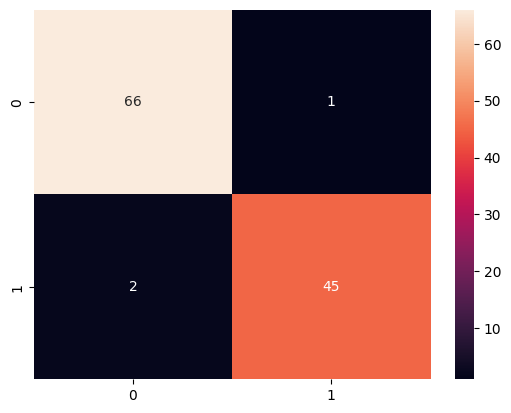

In [28]:
sns.heatmap(cm,annot=True)

In [29]:
print("Accuracy" + str(accuracy_score(y_test,y_pred)))

Accuracy0.9736842105263158


Malignant (0)

In [30]:
input_features =[13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072]

In [31]:
array_2d = np.reshape(input_features, (1,30))

In [32]:
X_input = sc.transform(array_2d)

d:\a27_YEARS_OLD\PCA_Feature_Engineering\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
X_input = lda.transform(X_input)

In [34]:
y_output = cls.predict(X_input)

In [35]:
y_output[0]

'Malignant'